<a href="https://colab.research.google.com/github/Bindhubhavanan/CodeTech_IT_Solutions_Artificial_Intelligence/blob/main/Task_1_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import hamming_loss

In [ ]:
data=pd.read_csv("/content/shopping_trends.csv")

In [ ]:
data.dropna()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [ ]:
data.isnull()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Season_Encoded'] = encoder.fit_transform(data['Season'])

In [ ]:
X = data['Season_Encoded']

In [ ]:
selected_features = ['Season','Category','Frequency of Purchases' ]

In [ ]:
X = data['Season']

In [ ]:
Y_category = data['Category']
Y_frequency = data['Frequency of Purchases']

In [ ]:
model_category = RandomForestClassifier(random_state=30)
model_frequency = RandomForestClassifier(random_state=30)

In [ ]:
X_encoded = encoder.fit_transform(X)

In [ ]:
X_encoded = X_encoded.reshape(-1, 1)

In [ ]:
X_train, X_test, Y_category_train, Y_category_test = train_test_split(X_encoded, Y_category, test_size=0.2, random_state=30)
X_train, X_test, Y_frequency_train, Y_frequency_test = train_test_split(X_encoded, Y_frequency, test_size=0.2, random_state=30)

In [ ]:
model_category.fit(X_train, Y_category_train)
model_frequency.fit(X_train, Y_frequency_train)

RandomForestClassifier(random_state=30)

In [ ]:
model_category.fit(X_train, Y_train)

RandomForestClassifier(random_state=30)

In [ ]:
model_category.fit(X_train, Y_category_train)

RandomForestClassifier(random_state=30)

In [ ]:
model_category.fit(X_train, Y_train)

RandomForestClassifier(random_state=30)

In [ ]:
Y_pred = model_category.predict(X_test)

In [ ]:
Y_category_pred = model_category.predict(X_test)
Y_frequency_pred = model_frequency.predict(X_test)

In [ ]:
Y_category_pred = Y_category_pred[:, 0]

In [ ]:
accuracy_category = accuracy_score(Y_category_test, Y_category_pred)
accuracy_frequency = accuracy_score(Y_frequency_test, Y_frequency_pred)

In [ ]:
print(f"Accuracy for Category: {accuracy_category}")
print(f"Accuracy for Frequency of Purchases: {accuracy_frequency}")

Accuracy for Category: 0.43333333333333335
Accuracy for Frequency of Purchases: 0.1294871794871795


In [ ]:
overall_accuracy = (accuracy_category + accuracy_frequency) / 2
print(f"Overall Accuracy: {overall_accuracy}")

Overall Accuracy: 0.2814102564102564


In [ ]:
print(len(X_test)), print(len(Y_pred))

780
780


(None, None)

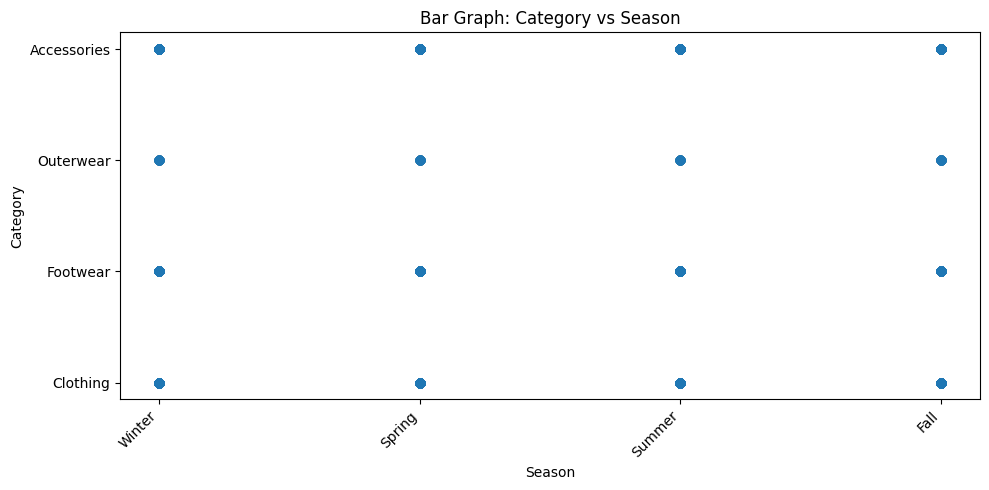

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Season'], data['Category'])
plt.xlabel("Season")
plt.ylabel("Category")
plt.title("Bar Graph: Category vs Season")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

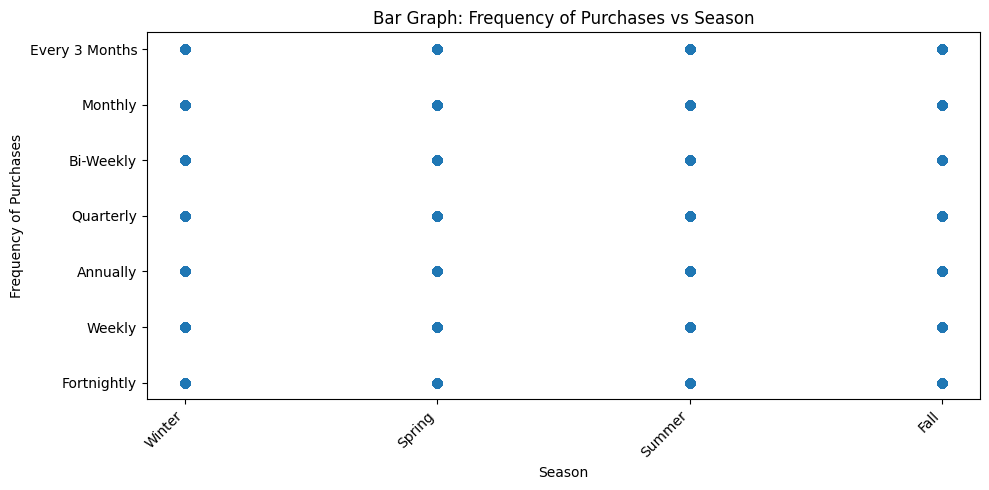

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Season'], data['Frequency of Purchases'])
plt.xlabel("Season")
plt.ylabel("Frequency of Purchases")
plt.title("Bar Graph: Frequency of Purchases vs Season")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()